In [1]:
import json 
import os 
base_path = "../results"
os.listdir(base_path)

['village_multi_house-bundang.json',
 'parsed_village_multi_house-bundang.json',
 'village_multi_house-guro.json']

In [4]:
all_results = {}
for f in os.listdir(base_path):
    with open(os.path.join(base_path, f)) as handle:
        if "parsed" not in f:
            all_results[f] = json.load(handle)


In [5]:
all_results.keys()

dict_keys(['village_multi_house-bundang.json', 'village_multi_house-guro.json'])

In [8]:
from bs4 import BeautifulSoup 
html_doc = all_results['village_multi_house-guro.json']['0']
soup = BeautifulSoup(html_doc, 'html.parser')


In [9]:
soup.title, soup.title.name, soup.title.string

(<title>네이버 부동산</title>, 'title', '네이버 부동산')

In [10]:
print("-------------------- ")
print(" 단지 정보 ")
for link in soup.find_all('div', "list_complex_info"): 
    # print(link.get_text())
    feature = link.find("dl", "complex_feature")
    dt = [f.string for f in feature.find_all("dt")]
    dd = [f.string for f in feature.find_all("dd")]
    print(link.h3.string)
    print(dt)
    print(dd)
    
    info = link.find("div", "complex_summary_info")
    idt = [f.string for f in info.find_all("dt")]
    idd = [f.string for f in info.find_all("dd")]
    print(idt)
    print(idd)
    break
    
print("-------------------- ")
print(" 아이템 분석")
for item in soup.find_all("div", "item_inner"):
    spans = [(i['class'][0], i.string) for i in item.find_all("span")]
    for s in spans:
        print(s)
    
    break


-------------------- 
 단지 정보 
LG신도림자이
['세대수', '동수', '사용승인일', '면적']
['299세대', '총 3동', '2004.02.07', '117.96㎡ ~ 126.74㎡']
['매매가', '전세가']
['11억 4,000~12억 8,000', '6억~7억 3,000']
-------------------- 
 아이템 분석
('confirm_type', None)
('text', 'LG신도림자이 102동')
('type', '매매')
('price', '12억 3,000')
('spec', '117/84m², 3/31층, 동향')
('spec', '거실확장,신도림역도보6분.이사협의,구조좋은아파트.')
('agent_info', '알터 제공')
('agent_info', '신도림공인중개사사무소')
('label', None)


<html class="no-js" data-user-agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/99.0.4844.84 Safari/537.36" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   네이버 부동산
  </title>
  <meta content="네이버 부동산" name="description"/>
  <meta content="article" property="og:type"/>
  <meta content="네이버 부동산" property="og:article:author"/>
  <meta content="http://m.land.naver.com" property="og:article:author:url"/>
  <meta content="네이버 부동산" property="og:title"/>
  <meta content="http://m.land.naver.com" property="og:url"/>
  <meta content="https://landthumb-phinf.pstatic.net/20201030_229/land_naver_1604037626049TB83t_PNG/%B3%D7%C0%CC%B9%F6_%BA%CE%B5%BF%BB%EA.png" property="og:image"/>
  <meta content="네이버 부동산" property="og:description"/>
  <meta content="네이버 부동산" name="description"/>
  <meta content="always" name="referrer"/>
  <link href="https://m.naver.com/favicon.ico" rel="
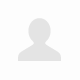
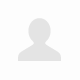

In [11]:
print(soup.prettify())

In [18]:
soup = BeautifulSoup(html_doc, 'html.parser')
result = {}
for link in soup.find_all('div', "list_complex_info"): 
    # print(link.get_text())
    feature = link.find("dl", "complex_feature")
    dt = [f.string for f in feature.find_all("dt")]
    dd = [f.string for f in feature.find_all("dd")]
    village = str(link.h3.string)
    result[village] = {'info':{}, "items":[]}
    for d1, d2 in zip(dt, dd):
        d1 = str(d1)
        result[village]['info'][d1] = d2

    info = link.find("div", "complex_summary_info")
    dt = [f.string for f in info.find_all("dt")]
    dd = [f.string for f in info.find_all("dd")]
    for d1, d2 in zip(dt, dd):
        result[village]['info'][d1] = str(d2)

for item in soup.find_all("div", "item_inner"):
    spans = item.find_all("span")
    span_dict = {i['class'][0]:[] for i in spans}
    for i in spans:
        span_dict[str(i['class'][0])].append(i)
        # print(i)
        if i['class'][0] == "price":
            v = i.find("span", "slash")
            print(v)
            print(i)
            print(i.text)
    result[village]['items'].append(span_dict)

None
<span class="price">12억 3,000</span>
12억 3,000
None
<span class="price">7억</span>
7억
None
<span class="price">6억</span>
6억
None
<span class="price">7억</span>
7억
None
<span class="price">12억</span>
12억
None
<span class="price">12억 8,000</span>
12억 8,000
None
<span class="price">11억 7,000</span>
11억 7,000
None
<span class="price">11억 7,000</span>
11억 7,000
None
<span class="price">11억 7,000</span>
11억 7,000
<span class="slash">/</span>
<span class="price">3억<span class="slash">/</span>100</span>
3억/100
None
<span class="price">12억 8,000</span>
12억 8,000
None
<span class="price">12억</span>
12억
None
<span class="price">12억</span>
12억
None
<span class="price">12억 3,000</span>
12억 3,000
<span class="slash">/</span>
<span class="price">3억<span class="slash">/</span>100</span>
3억/100
<span class="slash">/</span>
<span class="price">3억<span class="slash">/</span>100</span>
3억/100
<span class="slash">/</span>
<span class="price">3억<span class="slash">/</span>100</span>
3억/100
None
<span cla